In [1]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
train.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,658.0,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.403311,0.406869,31.935479,4356.94587
1,1,109.0,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.538704,0.463065,37.033298,6374.44430
2,2,564.0,25.0,0.50,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.474625,0.436043,34.338492,5462.13394
3,3,674.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.543972,0.441470,36.301847,6443.25690
4,4,467.0,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.566319,0.461905,36.047770,6643.90190


In [4]:
# check for null values
train.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [3]:
# drop id column
train.drop('id', axis =1, inplace= True)
train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,658.0,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.403311,0.406869,31.935479,4356.94587
1,109.0,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.538704,0.463065,37.033298,6374.44430
2,564.0,25.0,0.50,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.474625,0.436043,34.338492,5462.13394
3,674.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.543972,0.441470,36.301847,6443.25690
4,467.0,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.566319,0.461905,36.047770,6643.90190


In [7]:
train.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,425.581267,19.719333,0.389244,0.284588,0.485845,0.591301,82.150340,49.660020,68.638773,59.213653,28.655240,48.553540,18.730664,0.325960,0.500698,0.445770,36.106349,6019.556436
std,213.611550,6.678575,0.406638,0.058933,0.148237,0.146388,9.087681,5.510267,7.590940,6.567238,3.179366,5.356475,11.798220,0.165694,0.076970,0.038424,4.117149,1360.514312
min,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,33.000000,1.000000,0.000000,0.163962,0.000000,22.079199,1637.704020
25%,245.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418056,33.231562,5086.609910
50%,466.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.445497,35.988555,6109.850470
75%,596.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472468,39.158238,7044.567610
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,50.800000,55.900000,34.000000,0.560000,0.848908,0.854364,46.585105,8969.401840


<Axes: title={'center': 'Correlation Matrix\n'}>

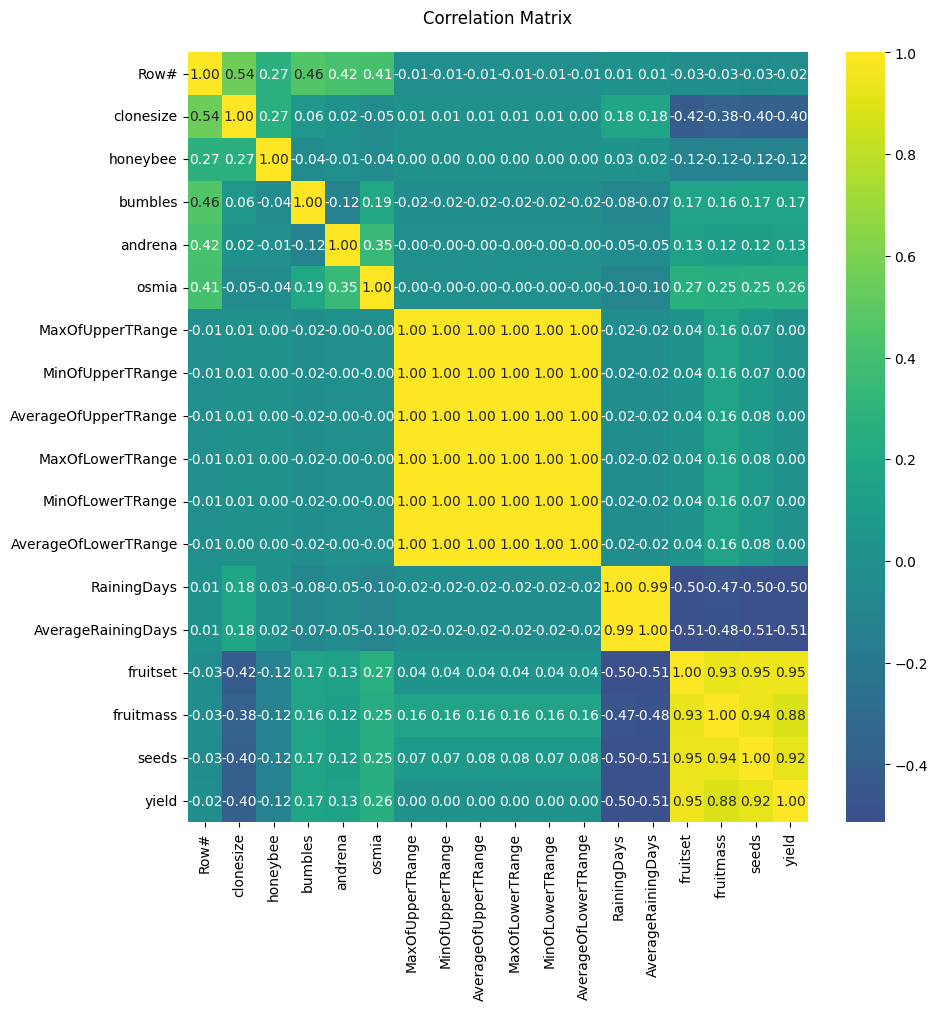

In [8]:
# correlation graph to see how features are related to each other
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix\n')
sns.heatmap(train.corr(),annot=True, fmt='.2f', cmap='viridis', center=0)

Text(0, 0.5, 'Frequency')

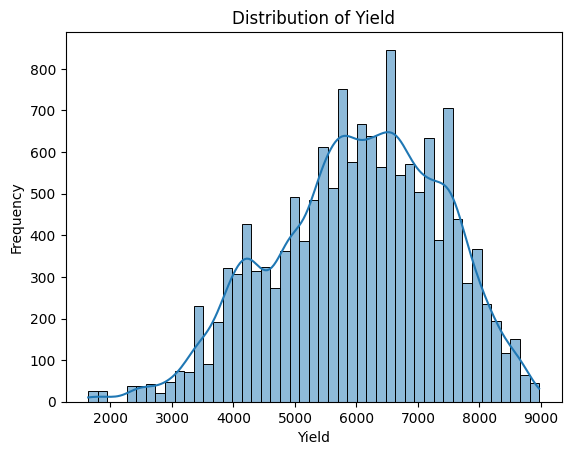

In [9]:
# Distribution of the target variable
sns.histplot(train['yield'], kde=True)
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')

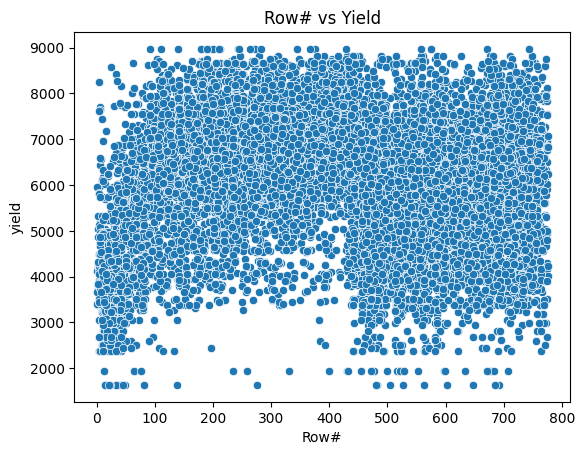

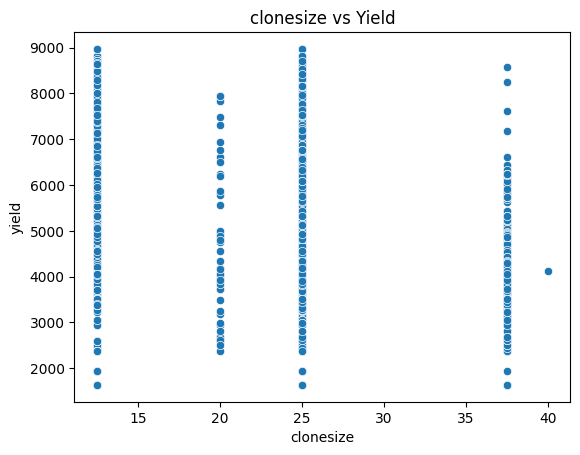

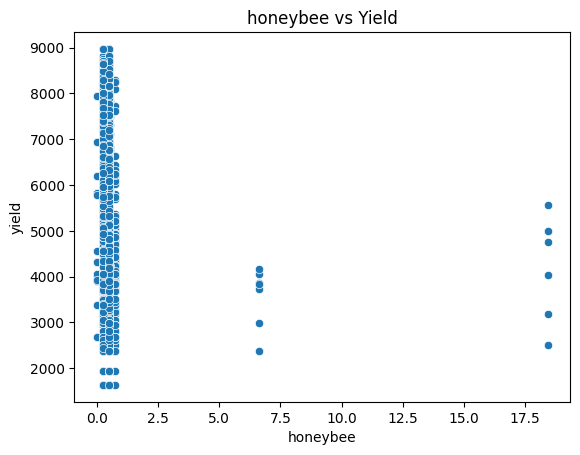

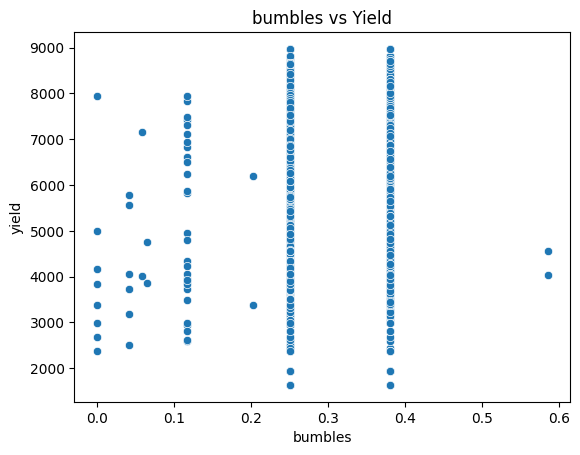

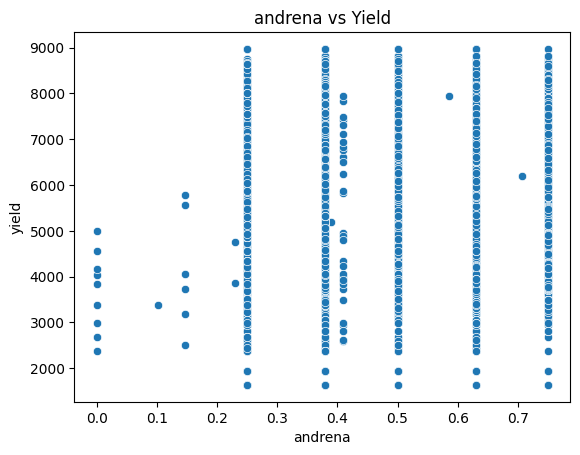

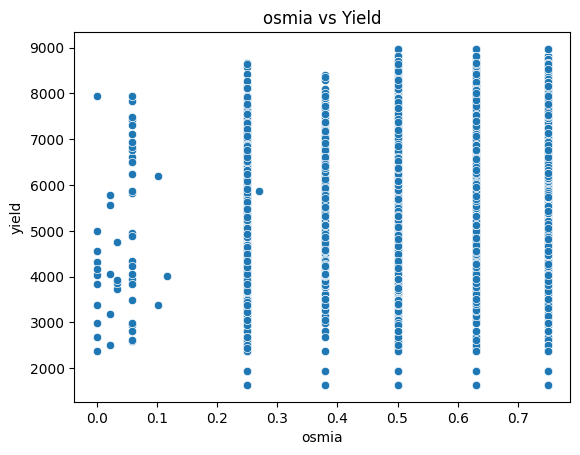

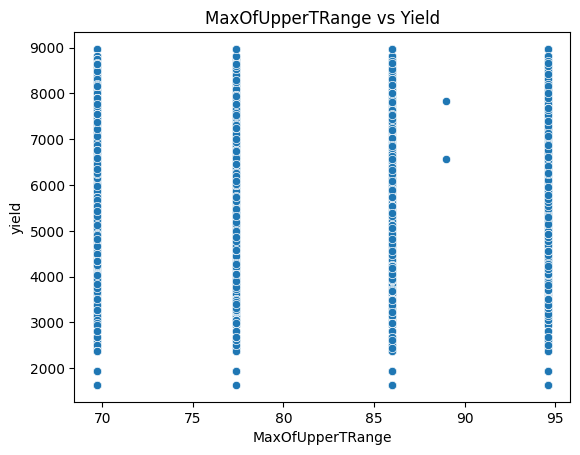

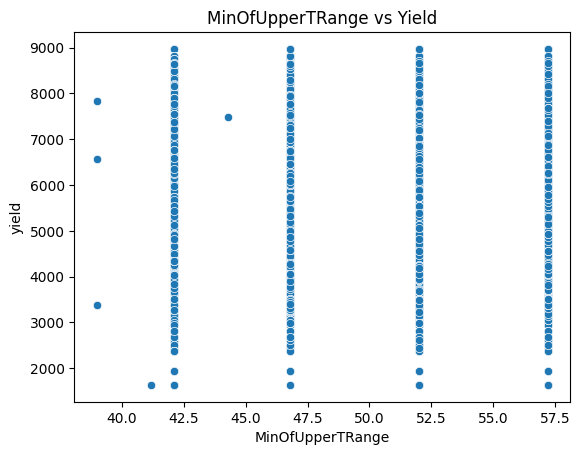

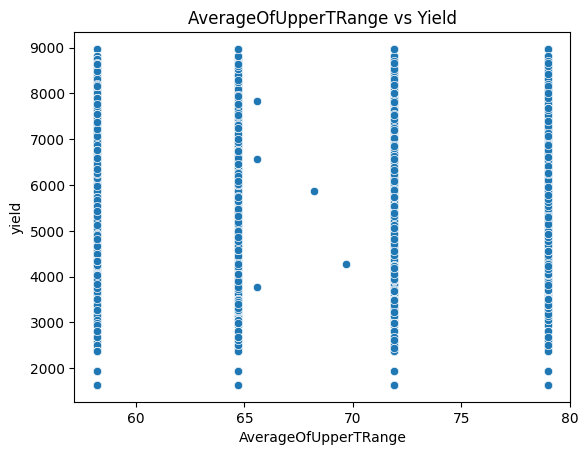

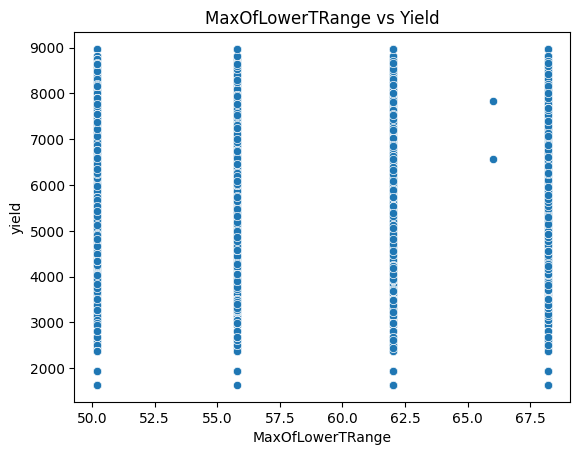

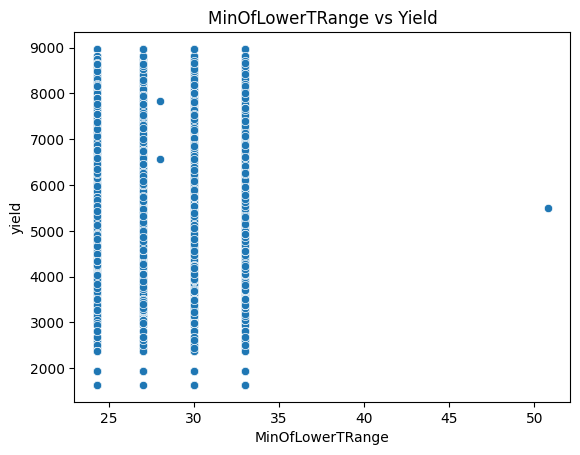

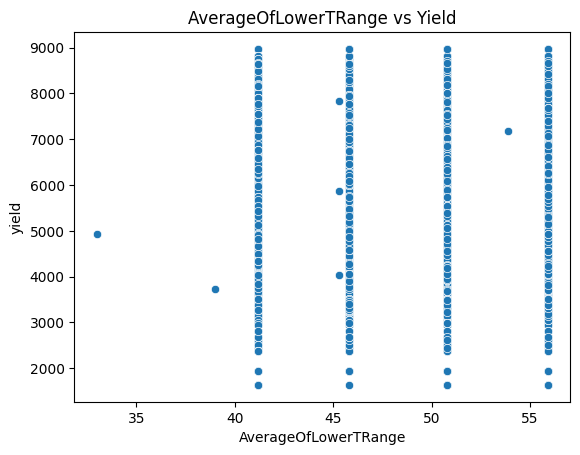

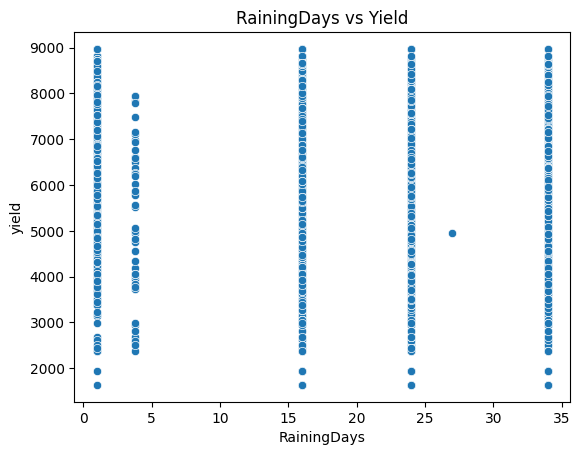

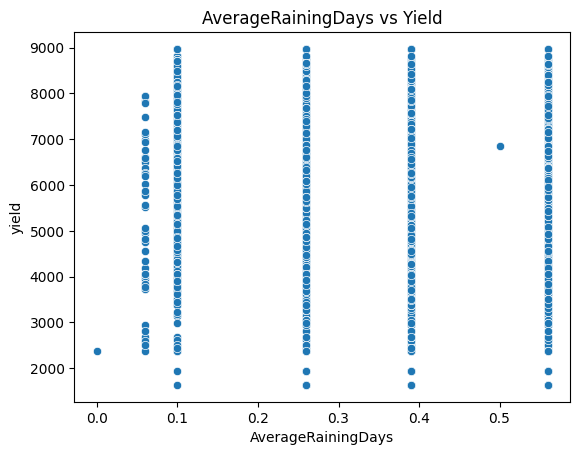

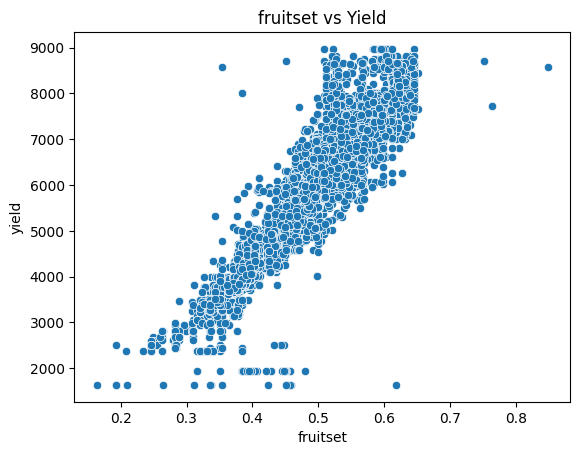

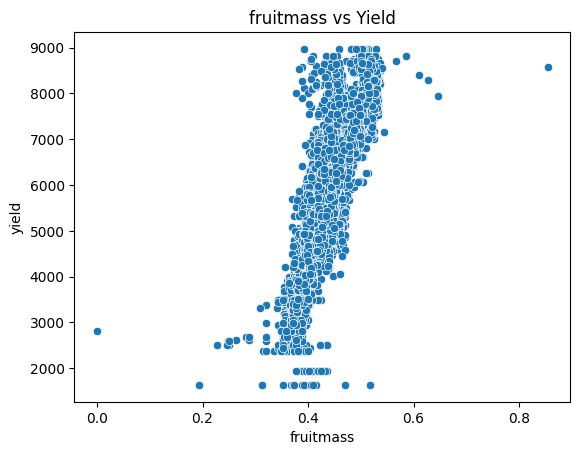

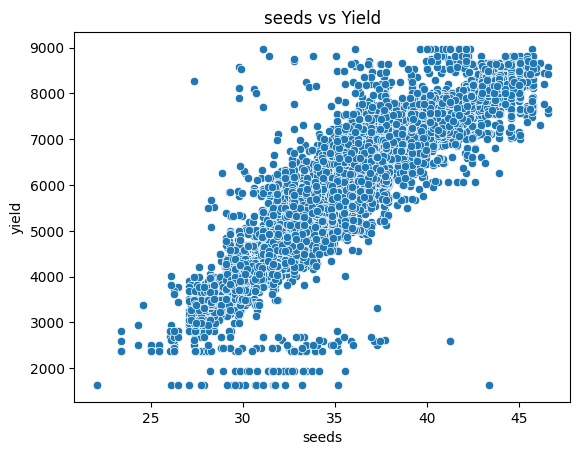

In [10]:
# Scatter plots for features vs target
for feature in train.columns:
    if feature != 'yield':
        plt.figure()
        sns.scatterplot(x=train[feature], y=train['yield'])
        plt.title(f'{feature} vs Yield')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'clonesize'),
  Text(1, 0, 'honeybee'),
  Text(2, 0, 'bumbles'),
  Text(3, 0, 'andrena'),
  Text(4, 0, 'osmia'),
  Text(5, 0, 'MaxOfUpperTRange'),
  Text(6, 0, 'MinOfUpperTRange'),
  Text(7, 0, 'AverageOfUpperTRange'),
  Text(8, 0, 'MaxOfLowerTRange'),
  Text(9, 0, 'MinOfLowerTRange'),
  Text(10, 0, 'AverageOfLowerTRange'),
  Text(11, 0, 'RainingDays'),
  Text(12, 0, 'AverageRainingDays'),
  Text(13, 0, 'fruitset'),
  Text(14, 0, 'fruitmass'),
  Text(15, 0, 'seeds')])

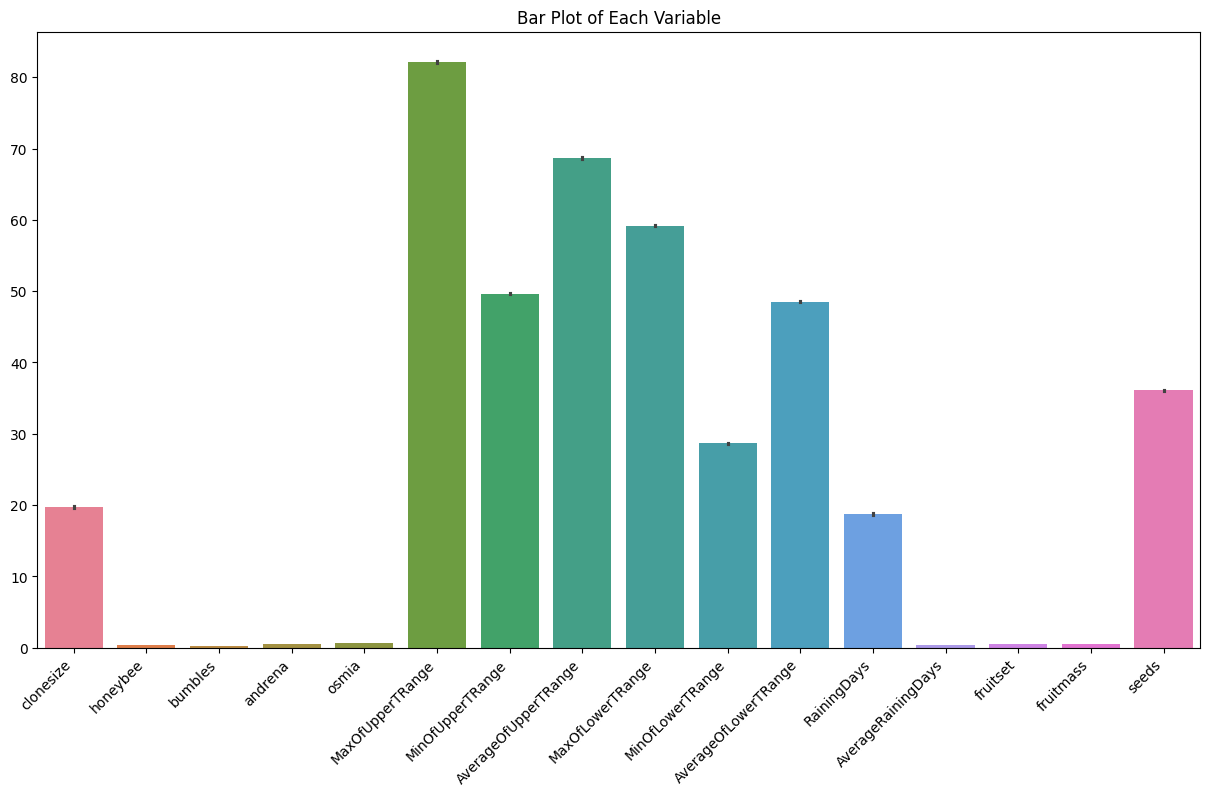

In [11]:
# Create a bar plot for each variable in a single graph
selected_columns = list(train.columns)
selected_columns.remove('yield')
selected_columns.remove('Row#')
plt.figure(figsize=(15, 8))
sns.barplot(data=train[selected_columns])
plt.title('Bar Plot of Each Variable')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

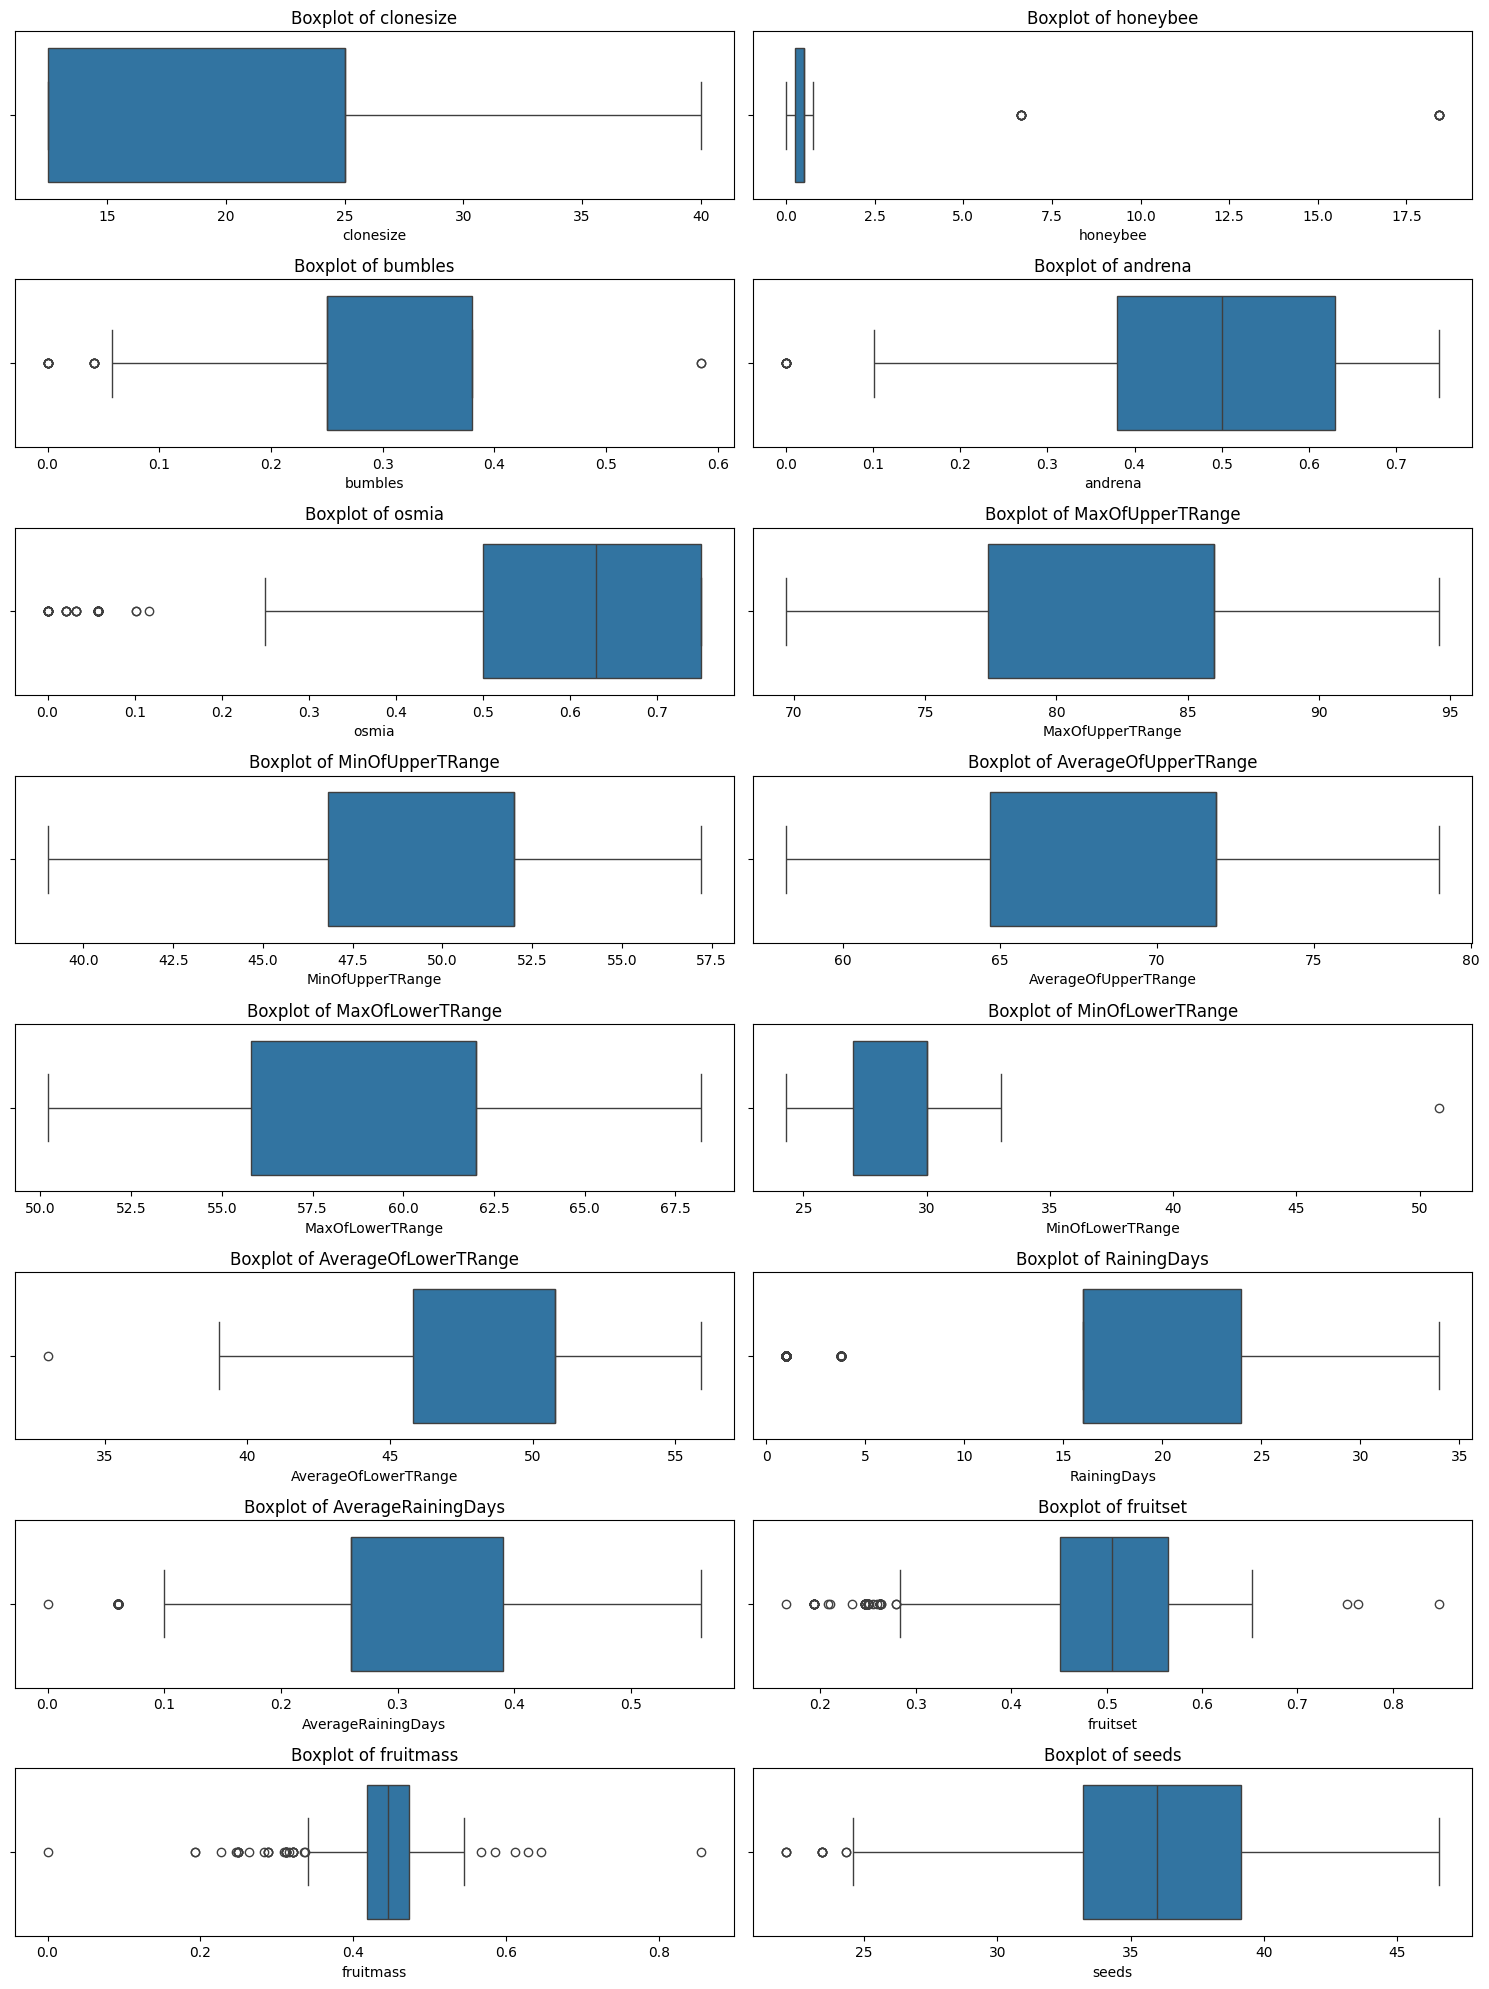

In [12]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for i, column in enumerate(selected_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')


plt.tight_layout()

In [13]:
train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,658.0,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.403311,0.406869,31.935479,4356.94587
1,109.0,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.538704,0.463065,37.033298,6374.44430
2,564.0,25.0,0.50,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.474625,0.436043,34.338492,5462.13394
3,674.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.543972,0.441470,36.301847,6443.25690
4,467.0,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.566319,0.461905,36.047770,6643.90190


In [14]:
train.size

270000

In [15]:
train['Row#'].value_counts()

Row#
599.0    72
517.0    71
672.0    69
581.0    68
583.0    67
         ..
606.0     2
362.0     1
768.0     1
700.0     1
655.0     1
Name: count, Length: 774, dtype: int64

In [4]:
columns_with_outliers = ['Row#' ,'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield']

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for column in columns_with_outliers:
    train = remove_outliers(train, column)

In [17]:
train.size

202770

<Axes: title={'center': 'Correlation Matrix\n'}>

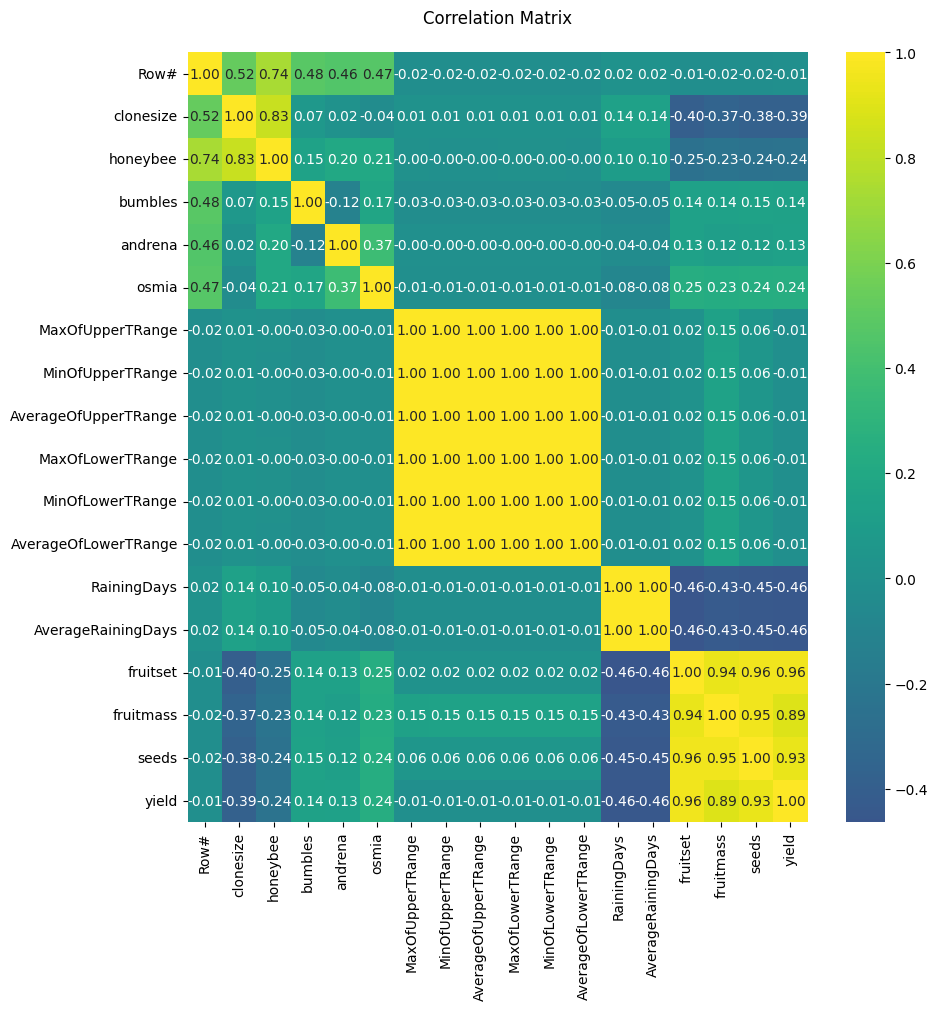

In [18]:
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix\n')
sns.heatmap(train.corr(),annot=True, fmt='.2f', cmap='viridis', center=0)

In [5]:
# keeping only Average of UpperTRange, Average of LowerTRange and Average Raining days (Same correlation)
train.drop(['MaxOfUpperTRange','MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays'], axis= 1, inplace=True)
a = test['id']
test.drop([ 'id','MaxOfUpperTRange','MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays'], axis= 1, inplace=True)

In [20]:
train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,658.0,25.0,0.50,0.38,0.38,0.63,64.7,45.8,0.56,0.403311,0.406869,31.935479,4356.94587
1,109.0,12.5,0.25,0.25,0.25,0.63,79.0,55.9,0.39,0.538704,0.463065,37.033298,6374.44430
2,564.0,25.0,0.50,0.25,0.63,0.63,71.9,50.8,0.26,0.474625,0.436043,34.338492,5462.13394
3,674.0,25.0,0.50,0.38,0.38,0.63,58.2,41.2,0.26,0.543972,0.441470,36.301847,6443.25690
4,467.0,25.0,0.50,0.25,0.38,0.50,79.0,55.9,0.26,0.566319,0.461905,36.047770,6643.90190


In [6]:
X = train.drop('yield', axis=1)
y = train['yield']

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import cross_val_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
test.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,706.0,25.0,0.50,0.38,0.50,0.50,64.7,45.8,0.26,0.508275,0.453868,36.018624
1,265.0,12.5,0.25,0.25,0.63,0.50,58.2,41.2,0.26,0.552359,0.455405,38.534569
2,395.0,12.5,0.25,0.38,0.38,0.75,64.7,45.8,0.39,0.611726,0.509528,42.799055
3,565.0,25.0,0.50,0.25,0.63,0.63,79.0,55.9,0.26,0.506794,0.452310,36.674243
4,16.0,37.5,0.25,0.25,0.25,0.25,71.9,50.8,0.39,0.386065,0.391583,30.274972


In [26]:
test.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
AverageOfUpperTRange    0
AverageOfLowerTRange    0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

# Fit linear regression on the principal components
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test_scaled)

# Calculate and print the mean squared error
mse = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression mean_absolute_error: {mse}')

Linear Regression mean_absolute_error: 255.66441333935714


In [29]:
y_test_pred_LR = lm.predict(test_scaled)
y_test_pred_LR

array([6142.00678968, 6985.07377446, 7934.31157052, ..., 8185.89599144,
       4057.89020496, 5185.16567312])

In [30]:
submission_LR = pd.DataFrame({'id': a, 'yield': y_test_pred_LR})
submission_LR


,id,yield
0,15000,6142.006790
1,15001,6985.073774
2,15002,7934.311571
3,15003,6112.041529
4,15004,4045.443597
...,...,...
9995,24995,6109.055091
9996,24996,5434.257594
9997,24997,8185.895991
9998,24998,4057.890205


In [31]:
submission_LR.to_csv("submission_LR.csv",header=True,index=False)

## Ridge Regression

In [32]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_MedAE =  mean_absolute_error(y_test, ridge_predictions)
print(f'Ridge Regression mean_absolute_error: {ridge_MedAE}')

Ridge Regression mean_absolute_error: 255.66688721784305


In [33]:
y_test_pred_Ridge = ridge_model.predict(test_scaled)
y_test_pred_Ridge

submission_Ridge = pd.DataFrame({'id': a, 'yield': y_test_pred_Ridge})
submission_Ridge

,id,yield
0,15000,6142.139668
1,15001,6984.856276
2,15002,7934.611269
3,15003,6111.949509
4,15004,4045.283780
...,...,...
9995,24995,6109.330133
9996,24996,5434.507734
9997,24997,8186.179585
9998,24998,4058.433757


In [34]:
submission_Ridge.to_csv("submission_Ridge.csv",header=True,index=False)

## Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

lasso_model = Ridge(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_MedAE =  mean_absolute_error(y_test,lasso_predictions)
print(f'Ridge Regression mean_absolute_error: {ridge_MedAE}')

Ridge Regression mean_absolute_error: 255.66688721784305


In [36]:
y_test_pred_Lasso = lasso_model.predict(test_scaled)
y_test_pred_Lasso

submission_Lasso = pd.DataFrame({'id': a, 'yield': y_test_pred_Lasso})
submission_Lasso

,id,yield
0,15000,6142.139668
1,15001,6984.856276
2,15002,7934.611269
3,15003,6111.949509
4,15004,4045.283780
...,...,...
9995,24995,6109.330133
9996,24996,5434.507734
9997,24997,8186.179585
9998,24998,4058.433757


In [37]:
submission_Lasso.to_csv("submission_Lasso.csv",header=True,index=False)

## SVR

In [38]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled,y_train)
svr_predictions = svr_model.predict(X_test_scaled)
svr_MedAE = mean_absolute_error(y_test,svr_predictions)
print(f'Support Vector Regression mean_absolute_error: {svr_MedAE}')

Support Vector Regression mean_absolute_error: 267.5477541102396


In [39]:
y_test_pred_SVR = svr_model.predict(test_scaled)
y_test_pred_SVR

submission_SVR = pd.DataFrame({'id': a, 'yield': y_test_pred_Lasso})
submission_SVR

,id,yield
0,15000,6142.139668
1,15001,6984.856276
2,15002,7934.611269
3,15003,6111.949509
4,15004,4045.283780
...,...,...
9995,24995,6109.330133
9996,24996,5434.507734
9997,24997,8186.179585
9998,24998,4058.433757


In [40]:
submission_SVR.to_csv("submission_SVR.csv",header=True,index=False)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf' : [2,],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test_scaled)


rf_MedAE = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest mean_absolute_error: {rf_MedAE}')

Random Forest mean_absolute_error: 237.0428810693686


In [44]:
y_test_pred_rf = best_model.predict(test_scaled)
y_test_pred_rf

submission_rf = pd.DataFrame({'id': a, 'yield': y_test_pred_rf})
submission_rf

,id,yield
0,15000,6217.929122
1,15001,6963.748191
2,15002,7800.381740
3,15003,6221.902623
4,15004,3988.727490
...,...,...
9995,24995,6226.231591
9996,24996,5397.041650
9997,24997,8187.397882
9998,24998,3819.632292


In [45]:
submission_rf.to_csv("submission_rf.csv",header=True,index=False)

## XGB regressor

In [11]:
from xgboost import XGBRegressor

xgb_param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 4, 5],'learning_rate': [0.1, 0.01, 0.001]}
xgb_grid_search = GridSearchCV(XGBRegressor(), param_grid=xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_scaled, y_train)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print("\nXGBRegressor:")
print("Best Parameters:", xgb_grid_search.best_params_)
print("Mean Squared Error:", xgb_mse)
print("Mean Absolute Error:", xgb_mae)
y_pred_test=xgb_best_model.predict(test_scaled)


XGBRegressor:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Mean Squared Error: 116295.25352397282
Mean Absolute Error: 238.2355666872295


In [12]:
submission_xgb = pd.DataFrame({'id': a, 'yield': y_pred_test})
submission_xgb

,id,yield
0,15000,6188.339844
1,15001,7062.480469
2,15002,7758.468262
3,15003,6246.070801
4,15004,3940.775879
...,...,...
9995,24995,6221.918945
9996,24996,5392.346191
9997,24997,8169.755371
9998,24998,3915.446533


In [13]:
submission_xgb.to_csv('xgb_submission.csv', index=False)